# r/IndieMusicFeedback Data Scrape

r/IndieMusicFeedback is a music feedback subreddit. After commenting on 5 other posts, users upload a link with their song on it and mark a genre.

In the month of December 2020:
  - What genre is posted the most frequently in r/IndieMusicFeedback?
  - What URL do users redirect their posts to?

## Scraping from Reddit

In [2]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import praw
from urllib.parse import urlparse
import numpy as np
import pprint
import pandas as pd

We need to use the reddit API with the praw package to access the data. Here's a link how to do that here:
https://alpscode.com/blog/how-to-use-reddit-api/


In [10]:
URL = 'https://www.reddit.com/r/IndieMusicFeedback/'

page = requests.get(URL)

bs = BeautifulSoup(page.content, 'html.parser')

reddit = praw.Reddit(client_id='REDACTED', 
                     client_secret='REDACTED', 
                     user_agent='IndieMusicFeedBack Scraping')

#The subreddit that I'm using is called r/IndieMusicFeedback. It's a music feedback forum for musicians and artists where each user is required to comment on 5 posts (with more than 110 characters) before they are allowed to post. 

https://api.pushshift.io/reddit/submission/search/?after=1577836800&before=1609459199&sort_type=score&sort=desc&subreddit=IndieMusicFeedback

Now we need to access the data. I want to see what we can find for all of 2020 on this subreddit. Reddit uses unix time, so I'm using a basic converter I found online to save me some time: https://www.epochconverter.com/. 
Let's get a quick look at the data.

In [11]:
imf = reddit.subreddit('IndieMusicFeedback').new(limit = 1000)
count = 0
for post in imf:
    #between jan 2020 and jan 2021
    if 1577836800 < post.created_utc < 1609459200:
        print(post.link_flair_text, post.title, post.url,post.created_utc, post.score, post.num_comments, post.upvote_ratio, count)
    count += 1

Electronic Hi IMF, i proudly present my 2nd release "Constant Signals - Retrospective" (Release date 01 01 2021) out now on streaming platforms and mp3 stores. feel free to comment/like/share/follow https://soundcloud.com/constantsignals/retrospective-demo 1609459027.0 1 10 1.0 610
Acoustic Rock Cover: Jane Says - Jane's Addiction | This is a very simple home made recording of Spanish guitar and voice and I'm looking for feedback. Thanks :) https://soundcloud.com/user-995385301/cover-jane-says-janes-addiction 1609458995.0 2 4 1.0 611
90s New Jack Swing - Across The Pond. Man, the New Jack Swing style of the 90s was epic. ABC, BBD, Colour Me Badd, Boys To Men, was reminded of them and thought "yeah, gonna drop that" because it's my prerogative (see what I did there?). Hope everyone had a safe and as happy as can be New Years Eve! https://soundcloud.com/user-925999813/new-jacked-swing 1609457196.0 1 4 1.0 612
Folk Rock So, this is different for me, but I have a folk-rock band (I'm the dr

Ambient Trap DreaMeter & Oliv - Cloud Up -- looking for postmortem feedback on this melodic trap beat that I can apply to future mixes. Any feedback that comes to mind is useful, thank you! https://soundcloud.com/dreameter/cloud-up 1609187889.0 1 6 1.0 700
Folk & Singer-Songwriter Daniel Stephen Turner - Eventually. This is one of my favourite songs that I have written so far. The recording isn’t perfect but I would love to hear what you think. https://open.spotify.com/track/5eSja7MfdLox4KfkVnQUrW?si=QdeWlab2TRuBSVqmJrestA 1609185071.0 1 13 1.0 701
Alternative Rock This is a track I've been working on for awhile: "Words." Going for an epic feel in this one and trying to combine synth vibes with big guitars. Do I get there? What do you like? What would you improve? Anything helps. Thanks for listening. https://soundcloud.com/10-000-20th-century-chair/words 1609180700.0 5 19 0.86 702
Synthwave Hi! My band Dead Rituals normally plays alternative rock music, but a French producer turned on

Indie Rock Happy holidays! If you are bored please check out this rough demo I've been working on - would love to get some early feedback https://soundcloud.com/user-48352803/pinnacles-rough-cut-v1 1608791916.0 1 8 1.0 800
Future Bass damper - inherited dream ; My 3rd release, kinda Future Bass / Electronic. Let me know what you think! https://v.redd.it/jsc2l5v9w2761 1608791276.0 18 21 1.0 801
Indie Mad Max Mathews Makes Machines Musical by Amateur Hockey Club- the closing track from my newest project. This is my first self-produced project with a full release. The song is mostly about feeling lost in post-grad life. Appreciate anybody listening! https://soundcloud.app.goo.gl/wrmQethFTMb3iiYF8 1608791175.0 2 8 1.0 802
Experimental Another crazy beat I made today. Its not supposed to be pretty. Any love/feedback is appreciated! https://soundcloud.com/mobbarley420/bodies 1608780960.0 2 8 1.0 803
Hip-hop & Rap I Matter - Mekter ft. Alex Parker (Quarantine Visual) As of today this is my mo

Ambient Techno/IDM Getting Lost in C Minor // My first try to integrate Microfreak, Eurorack and FL Studio in one record! https://soundcloud.com/isosthenie/gettinglostincminor 1608504296.0 4 17 0.84 900
Hip-hop & Rap Hi, my name is J-Benz. This is a track called, "Power, Love, and Greed". I posted it here before, but I changed the mix and gave it a video. https://www.youtube.com/watch?v=Rpohk4AdR-8 1608500242.0 1 6 1.0 901
Rock First video off our latest record https://www.reddit.com/r/IndieMusicFeedback/comments/kh1t5l/first_video_off_our_latest_record/ 1608496661.0 4 9 1.0 902
Alternative For those that have been HEART BROKEN. Looking for feedback on a upcoming release of mine! https://www.reddit.com/r/IndieMusicFeedback/comments/kh1kg1/for_those_that_have_been_heart_broken_looking_for/ 1608495928.0 3 8 1.0 903
Dance-Punk hope you like cowbell! made some dancepunk or something & looking to collab.. also streaming everywhere as 'phervor' so let me know what you think!! :) https://www.

Only getting around 1000 posts for this one. After some quick research, I'm learning that you can only scrape around 1000 posts at a time. I can try and use pushshift, an API that should help. (courtesy of https://www.reddit.com/r/redditdev/comments/8zhcmr/how_to_crawl_more_than_1000_posts_through_reddit/)

https://api.pushshift.io/reddit/submission/search/?after=1577836800&before=1609459199&sort_type=score&sort=desc&subreddit=IndieMusicFeedback

Okay, not much help on this one. A quick cmd + f shows me that there are only 21 posts shown based on the API (when searching for post descriptions). So we're going to use original tool and scale back the project to what we have access to: data in December.

## Cleaning the data

I'm cleaning the data as it's going in- making sure all the youtube/reddit/soundcloud/spotify links are alike so I can use them for later. 

After taking a break from this project for a few days, I see that I have fewer rows in my dataset. Looks like the Reddit API also updates what you can/ can't see in real time, seeing how i'm scraping the subreddit. Luckily, I have a csv of the everything I'm looking for in december. 


Now we are working with the csv, so I'll clean the data by:
- stripping the URL's
- Adjusting the comments (bots add 2 comments to every post, need to adjust)
- Converting from Unix to date-time (so we can stick within december)

In [4]:
IMF_df = pd.read_csv('IMF_DECEMBER.csv')

IMF_df.loc[(IMF_df['URL'] == 'youtu.be') | (IMF_df['URL'] == 'm.youtube') | (IMF_df['URL'] == 'music.youtube'), 'URL'] = 'youtube'
IMF_df.loc[(IMF_df['URL'] == 'i.redd.it') | (IMF_df['URL'] == 'v.redd.it'), 'URL'] = 'reddit'                             
IMF_df.loc[IMF_df['URL'] == 'soundcloud.app.goo.gl', 'URL'] = 'soundcloud'
IMF_df.loc[IMF_df['URL'] == 'm.soundcloud', 'URL'] = 'soundcloud'
IMF_df.loc[IMF_df['URL'] == 'open.spotify', 'URL'] = 'spotify'  
IMF_df.loc[IMF_df['URL'].str.contains('.bandcamp'), 'URL'] = 'bandcamp'


IMF_df['Upload Time'] = pd.to_datetime(IMF_df['Upload Time'], unit = 's')
IMF_df = IMF_df.drop(IMF_df.index[891:932])

IMF_df['Comments'] = IMF_df['Comments'] - 2

IMF_df

,Genre,Title,URL,Upload Time,Post Score,Comments,Upvote Ratio
0,Lofi,Lo-F1 by CaseOfficialMusic | Case Official Mus...,soundcloud,2021-01-01 00:29:14,1,9,1.0
1,Electronic,"Hi IMF, i proudly present my 2nd release ""Cons...",soundcloud,2020-12-31 23:57:07,1,3,1.0
2,Acoustic Rock,Cover: Jane Says - Jane's Addiction | This is ...,soundcloud,2020-12-31 23:56:35,2,0,1.0
3,90s,"New Jack Swing - Across The Pond. Man, the New...",soundcloud,2020-12-31 23:26:36,1,0,1.0
4,Folk Rock,"So, this is different for me, but I have a fol...",bandcamp,2020-12-31 22:30:06,2,2,1.0
...,...,...,...,...,...,...,...
886,RnB,Get You - Daniel Caesar Guitar Loop,youtube,2020-12-01 13:39:39,6,22,1.0
887,Instrumental Hip Hop,I made Freddie Dredd Type Beat. I know there’s...,soundcloud,2020-12-01 12:38:54,3,9,1.0
888,Hip-hop & Rap,maybe your god is like that (ft. Bjorn Vader),youtube,2020-12-01 04:32:58,1,16,1.0
889,Alternative,My first time ever posting here. I’ve given fe...,youtube,2020-12-01 01:12:05,1,6,1.0


In [25]:
IMF_df['Genre'].describe()

count                  878
unique                 125
top       Alternative Rock
freq                    57
Name: Genre, dtype: object

In [68]:
genre_count_df = pd.DataFrame(IMF_df['Genre'].value_counts(ascending = False))
pd.set_option('display.max_rows', genre_count_df.shape[0]+1)
genre_count_df.sum()
top_10= genre_count_df.nlargest(10,'Genre')
top_10.sum()

Genre    379
dtype: int64

Text(0.5, 0, 'Genre')

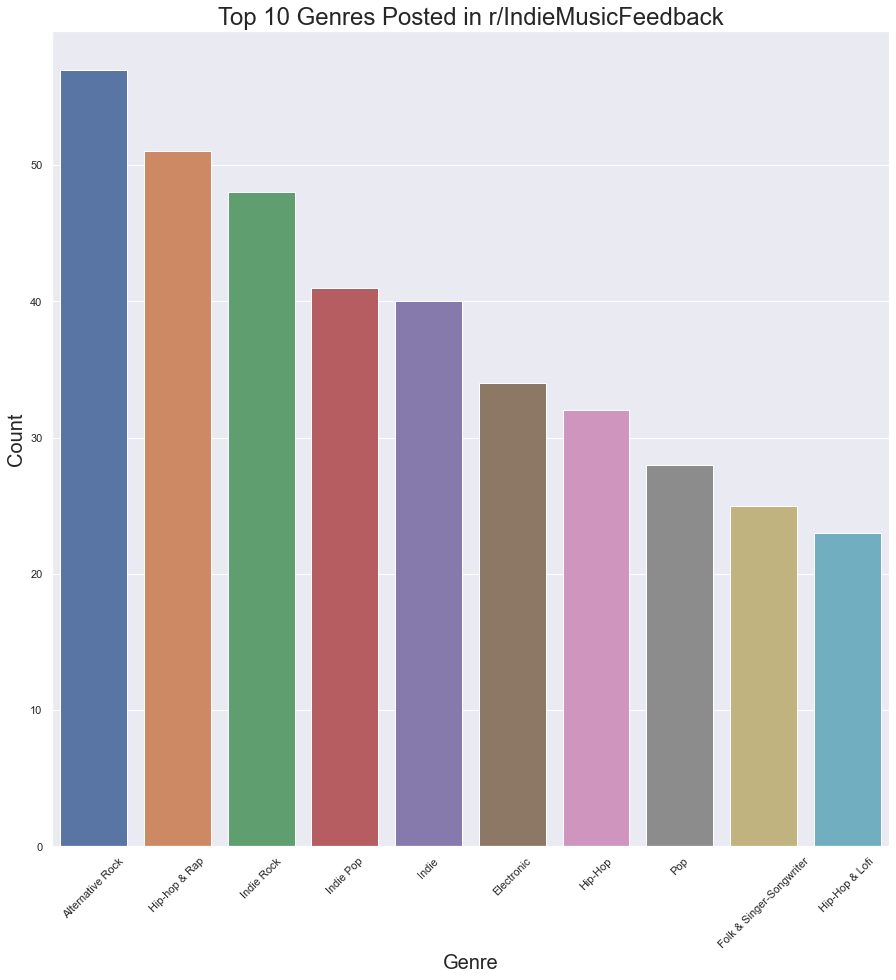

In [119]:
sns.set_theme(style="whitegrid")
sns.color_palette("coolwarm", as_cmap=True)
sns.set(rc={'figure.figsize':(15,15)})
genre_plot =sns.barplot(x = top_10.index , y = 'Genre', data= top_10,
            label="Total"
           )
sns.set(font_scale=2)
plt.xticks(rotation=45)
genre_plot.set_title('Top 10 Genres Posted in r/IndieMusicFeedback')
genre_plot.set_ylabel('Count',fontsize=20)
genre_plot.set_xlabel('Genre',fontsize=20)

Interestingly enough, these top 10 genres make up less than HALF (380/879) of the total 879 submisssions from december.

## Where do user-submitted URL's go to?

Users submit URL's with their music so other users can give feedback.

In [122]:
url_count_df = IMF_df['URL'].value_counts()
url_count_df = url_count_df.to_frame()
url_count_df_new = url_count_df.rename(columns={'URL': 'COUNT'}, index={'': 'URL'})

url_count_df_filtered = url_count_df_new[url_count_df_new['COUNT'] >= 5] 
url_count_df_filtered

,COUNT
youtube,375
soundcloud,261
spotify,140
reddit,75
bandcamp,27


I filtered out URL's that came up less than 5 times – they were the obscure ones that nobody really posted. 

Based on my own experience on the site, I'm pretty surprised how Youtube is the highest- I would have thought soundcloud is the most used redirect link because in my experience on the subreddit, I get a lot of soundcloud links... Or maybe I just choose to go there because it's a personal preference. 

Text(0.5, 0, 'URL')

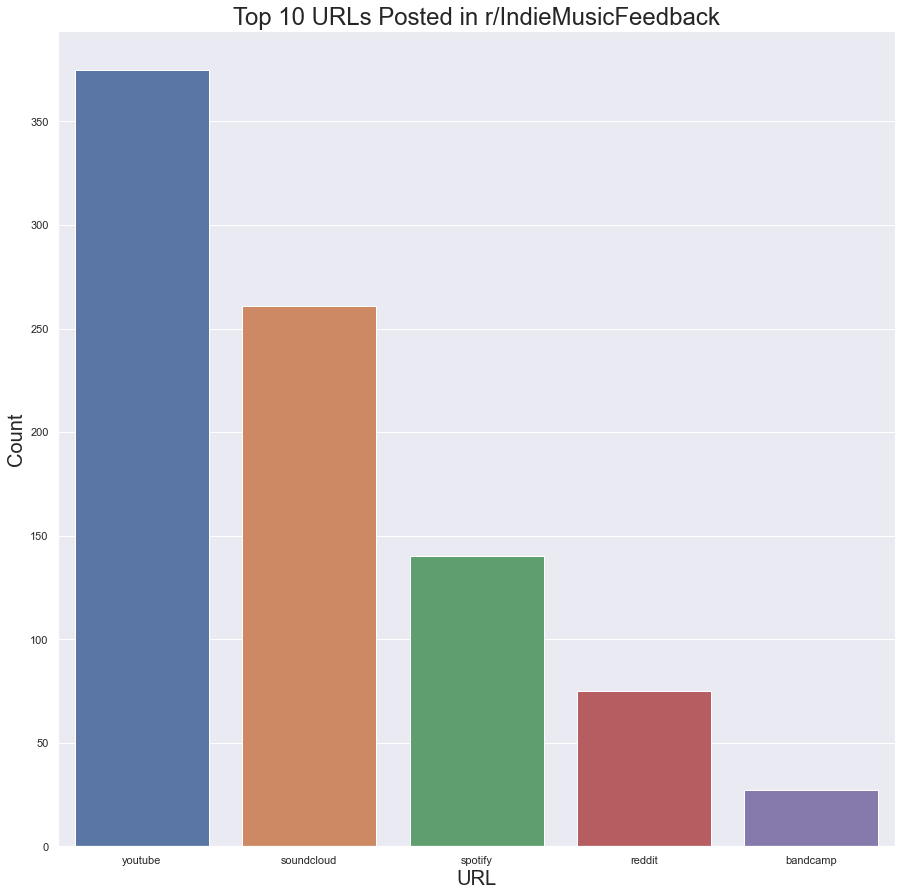

In [126]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,15)})
sns.color_palette("coolwarm", as_cmap=True)
barplot = sns.barplot(x = url_count_df_filtered.index , y = 'COUNT', data= url_count_df_filtered,
            label="Total")
sns.set(font_scale=2)
barplot.set_title('Top 10 URL''s Posted in r/IndieMusicFeedback')
barplot.set_ylabel('Count',fontsize=20)
barplot.set_xlabel('URL',fontsize=20)